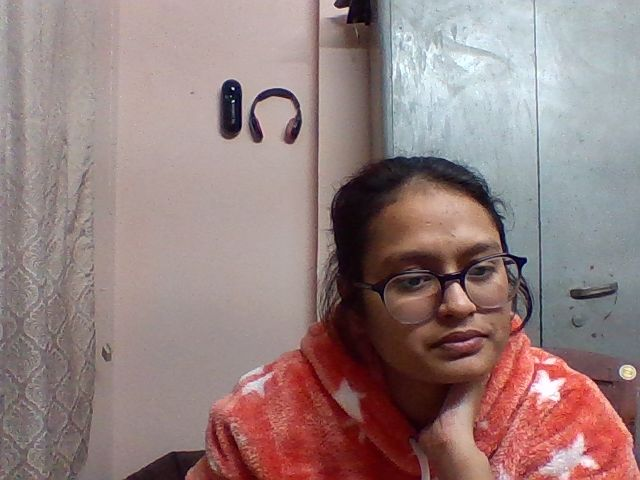

In [5]:
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import base64

def take_photo():
    js_code = """
        async function takePhotoInternal() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Create button
            const button = document.createElement('button');
            button.innerHTML = 'Capture Photo';
            button.style.fontSize = '20px';
            button.style.marginTop = '10px';
            document.body.appendChild(button);

            // Wait for user click
            await new Promise(resolve => button.onclick = resolve);

            // Capture to canvas
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();
            button.remove();

            return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhotoInternal();
    """

    data = eval_js(js_code)
    img_bytes = base64.b64decode(data.split(',')[1])
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

# Capture image
img = take_photo()
cv2_imshow(img)

# # on local system :
# import cv2
# cap = cv2.VideoCapture (0)
# width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# while True:
# ret, frame = cap.read()
# gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
# cv2.imshow('frame',gray)
# if cv2.waitKey(1) & 0xFF == ord('q'):
# break
# cap.release()
# cv2.destroyAllWindows()


In [6]:
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)


In [7]:
import cv2

def auto_crop_face(image):
    # Load Haar Cascade
    cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(cascade_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

    if len(faces) == 0:
        print("No face detected!")
        return None

    # taking the first detected face
    x, y, w, h = faces[0]

    # Crop only the face region
    cropped_face = image[y:y+h, x:x+w]

    return cropped_face


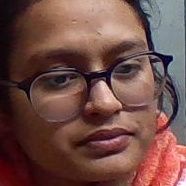

In [9]:
cropped = auto_crop_face(img) # applying the auto_crop

if cropped is not None:
    cv2_imshow(cropped)
